## Distribuição de carga em um anel quadrado com potencial fixo
Alunos: 
- Danilo Lima de Carvalho (dlc3)
- Luisa Fonseca Leiria de Andrade (lfla)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definição dos parâmetros do problema
L = 0.4  # Lado do anel quadrado (40 cm)
V0 = 10  # Potencial fixo (10 V)
epsilon_0 = 8.854e-12  # Permissividade do vácuo (F/m)

# Valores de N para análise de convergência
N_values = [20, 40, 80, 160,320,640,1280,2560]

In [2]:
# Função para calcular as coordenadas dos segmentos
def calcular_segmentos(N):
    num_lados = 4
    segmentos_por_lado = N // num_lados
    delta_s = L / segmentos_por_lado
    segmentos = []

    for lado in range(num_lados):
        for i in range(segmentos_por_lado):
            if lado == 0:
                x, y = -L/2 + i * delta_s + delta_s / 2, L/2
            elif lado == 1:
                x, y = L/2, L/2 - i * delta_s - delta_s / 2
            elif lado == 2:
                x, y = L/2 - i * delta_s - delta_s / 2, -L/2
            else:
                x, y = -L/2, -L/2 + i * delta_s + delta_s / 2
            segmentos.append((x, y))

    return np.array(segmentos), delta_s


In [3]:
def calcular_matriz_Z(N, segmentos, delta_s):
    if len(segmentos) != N:
        raise ValueError(f"Erro: número de segmentos ({len(segmentos)}) não corresponde a N ({N})")
    
    Z = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            if i == j:
                Z[i, j] = delta_s / (2 * np.pi * epsilon_0)
            else:
                ri = segmentos[i]
                rj = segmentos[j]
                distancia = np.linalg.norm(ri - rj)
                Z[i, j] = delta_s / (4 * np.pi * epsilon_0 * distancia)
    return Z

In [4]:
# 1ª e 2ª Questões: Formulação e Cálculo das Matrizes para N = 40
N = 40  # Escolhido para detalhar as matrizes
segmentos, delta_s = calcular_segmentos(N)
Z = calcular_matriz_Z(N, segmentos, delta_s)
V = np.full(N, V0)  # Vetor de tensões

In [5]:
# Exibir matrizes de impedância e tensão para N = 40
np.set_printoptions(precision=2, suppress=True)
print("Matriz de Impedância [Z]:")
print(Z)
print("\nVetor de Tensões [V]:")
print(V)

Matriz de Impedância [Z]:
[[7.19e+08 8.99e+09 4.49e+09 ... 3.53e+09 5.68e+09 1.27e+10]
 [8.99e+09 7.19e+08 8.99e+09 ... 3.08e+09 4.24e+09 5.68e+09]
 [4.49e+09 8.99e+09 7.19e+08 ... 2.54e+09 3.08e+09 3.53e+09]
 ...
 [3.53e+09 3.08e+09 2.54e+09 ... 7.19e+08 8.99e+09 4.49e+09]
 [5.68e+09 4.24e+09 3.08e+09 ... 8.99e+09 7.19e+08 8.99e+09]
 [1.27e+10 5.68e+09 3.53e+09 ... 4.49e+09 8.99e+09 7.19e+08]]

Vetor de Tensões [V]:
[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10]



Distribuição de Carga Superficial (C/m²) para N = 40:
1.41e-10
1.26e-10
1.23e-10
1.33e-10
1.45e-10
1.45e-10
1.33e-10
1.23e-10
1.26e-10
1.41e-10
1.41e-10
1.26e-10
1.23e-10
1.33e-10
1.45e-10
1.45e-10
1.33e-10
1.23e-10
1.26e-10
1.41e-10
1.41e-10
1.26e-10
1.23e-10
1.33e-10
1.45e-10
1.45e-10
1.33e-10
1.23e-10
1.26e-10
1.41e-10
1.41e-10
1.26e-10
1.23e-10
1.33e-10
1.45e-10
1.45e-10
1.33e-10
1.23e-10
1.26e-10
1.41e-10

Amplitudes dos pulsos (por segmento):
Segmento  1: Amplitude = 1.41e-10 C/m²
Segmento  2: Amplitude = 1.26e-10 C/m²
Segmento  3: Amplitude = 1.23e-10 C/m²
Segmento  4: Amplitude = 1.33e-10 C/m²
Segmento  5: Amplitude = 1.45e-10 C/m²
Segmento  6: Amplitude = 1.45e-10 C/m²
Segmento  7: Amplitude = 1.33e-10 C/m²
Segmento  8: Amplitude = 1.23e-10 C/m²
Segmento  9: Amplitude = 1.26e-10 C/m²
Segmento 10: Amplitude = 1.41e-10 C/m²
Segmento 11: Amplitude = 1.41e-10 C/m²
Segmento 12: Amplitude = 1.26e-10 C/m²
Segmento 13: Amplitude = 1.23e-10 C/m²
Segmento 14: Amplitude = 1.33e-10 C/m²


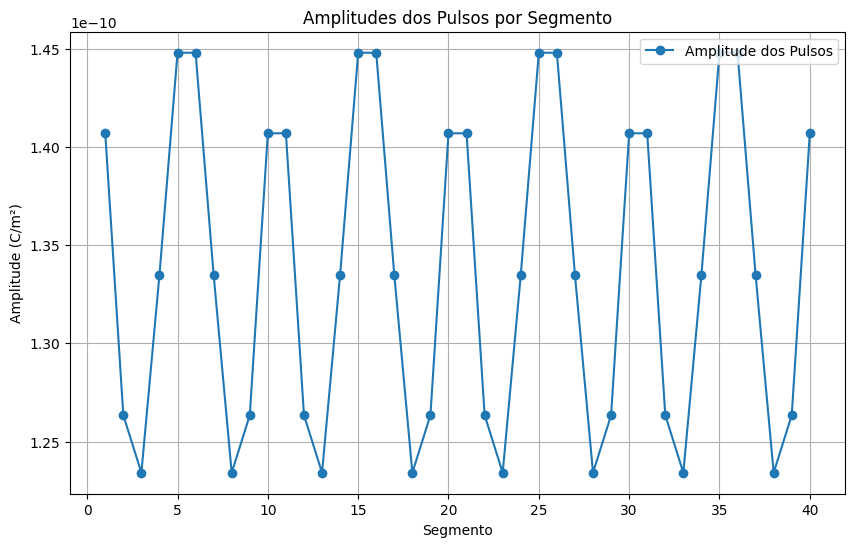


Carga total na placa para N = 40: 2.14e-10 C


In [6]:
# 3ª Questão: Resolver o sistema linear para encontrar a carga superficial
Q = np.linalg.solve(Z, V)
print("\nDistribuição de Carga Superficial (C/m²) para N = 40:")
for q in Q:
    print(f"{q:.2e}")

# Impressão das amplitudes dos pulsos (após a etapa #3)
print("\nAmplitudes dos pulsos (por segmento):")
for i, amplitude in enumerate(Q, start=1):
    print(f"Segmento {i:2d}: Amplitude = {amplitude:.2e} C/m²")

# Plot das amplitudes dos pulsos
plt.figure(figsize=(10, 6))
plt.plot(range(1, N+1), Q, marker='o', linestyle='-', label='Amplitude dos Pulsos')
plt.xlabel("Segmento")
plt.ylabel("Amplitude (C/m²)")
plt.title("Amplitudes dos Pulsos por Segmento")
plt.legend()
plt.grid()
plt.show()

# Cálculo da carga total
Q_total = np.sum(Q) * delta_s
print(f"\nCarga total na placa para N = 40: {Q_total:.2e} C")


Carga total para N = 20: 2.54e-10 C

Carga total para N = 40: 2.14e-10 C

Carga total para N = 80: 1.84e-10 C


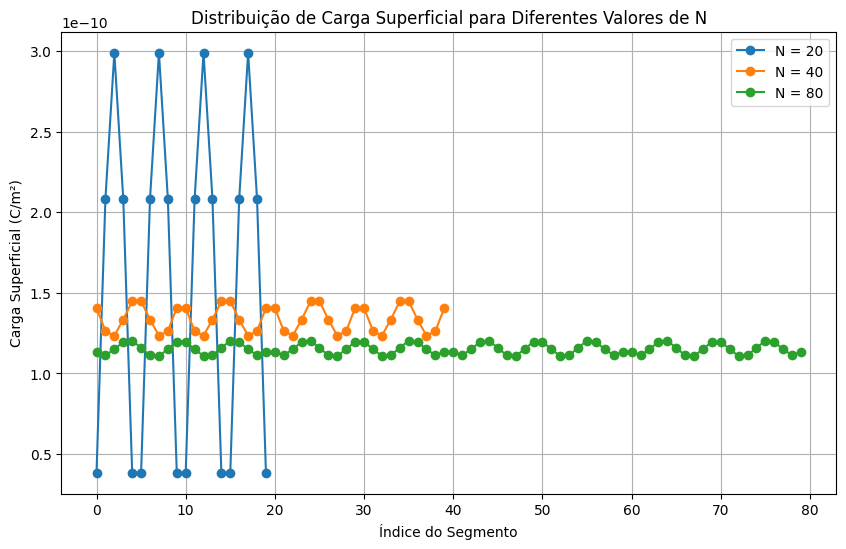

In [7]:
# 4ª Questão: Resolver e plotar para diferentes valores de N
distribuicoes = []
for N in [20, 40, 80]:
    segmentos, delta_s = calcular_segmentos(N)
    Z = calcular_matriz_Z(N, segmentos, delta_s)
    V = np.full(N, V0)
    Q = np.linalg.solve(Z, V)
    distribuicoes.append(Q)
    print(f"\nCarga total para N = {N}: {np.sum(Q) * delta_s:.2e} C")

# Plot da distribuição de carga para diferentes N
plt.figure(figsize=(10, 6))
for i, N in enumerate([20, 40, 80]):
    plt.plot(range(N), distribuicoes[i], marker='o', linestyle='-', label=f'N = {N}')
plt.xlabel("Índice do Segmento")
plt.ylabel("Carga Superficial (C/m²)")
plt.title("Distribuição de Carga Superficial para Diferentes Valores de N")
plt.legend()
plt.grid()
plt.show()

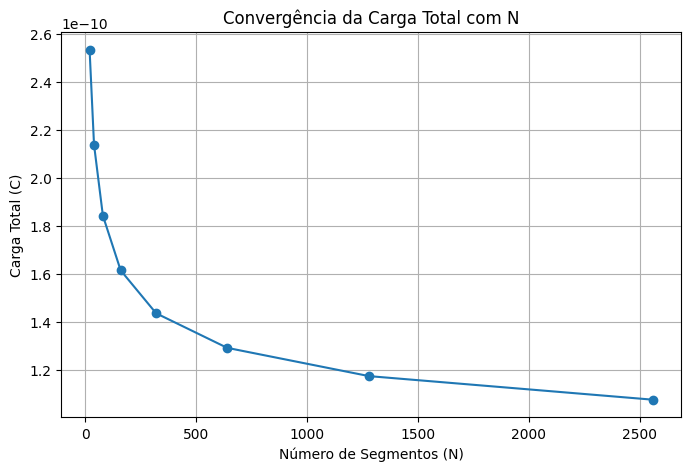

In [8]:
# 5ª Questão: Analisar convergência da carga total com N
Q_totais = []
for N in N_values:
    segmentos, delta_s = calcular_segmentos(N)
    Z = calcular_matriz_Z(N, segmentos, delta_s)
    V = np.full(N, V0)
    if len(segmentos) < N:
        print(f"Warning: N ({N}) is larger than the number of segments ({len(segmentos)}). Adjusting N to {len(segmentos)}.")
        N = len(segmentos)
    Q = np.linalg.solve(Z, V)
    Q_totais.append(np.sum(Q) * delta_s)

# Plot da convergência da carga total
plt.figure(figsize=(8, 5))
plt.plot(N_values, Q_totais, marker='o', linestyle='-')
plt.xlabel("Número de Segmentos (N)")
plt.ylabel("Carga Total (C)")
plt.title("Convergência da Carga Total com N")
plt.grid()

# Chamar plt.show() apenas uma vez no final
plt.show()